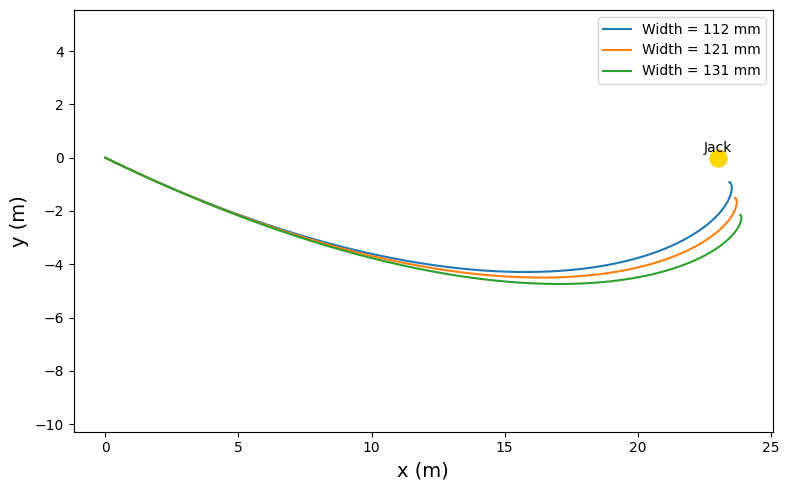

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Fixed physical parameters
# -----------------------------
a = 0.131          # rolling radius (m)
g = 9.81
mu = 0.02
d = 0.0008

v0 = 3.17
phi0 = -0.454
m = 1.59
dt = 0.01

# Bowl widths to compare (m)
widths = {
    "112 mm": 0.112,
    "121 mm": 0.121,
    "131 mm": 0.131
}

# -----------------------------
# Trajectory simulation
# -----------------------------
def simulate_path(b):
    I = (1/5) * m * (a**2 + b**2)

    t_max = v0 / (mu * g)
    N = int(t_max / dt)

    x = np.zeros(N)
    y = np.zeros(N)
    phi = np.zeros(N)
    v = np.zeros(N)

    v[0] = v0
    phi[0] = phi0

    for i in range(N - 1):
        v[i + 1] = max(v[i] - mu * g * dt, 1e-6)
        omega = v[i] / a
        Omega = (m * g * d) / (I * omega)

        phi[i + 1] = phi[i] + Omega * dt
        x[i + 1] = x[i] + v[i] * np.cos(phi[i]) * dt
        y[i + 1] = y[i] + v[i] * np.sin(phi[i]) * dt

    return x, y

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8, 5))

for label, b in widths.items():
    x, y = simulate_path(b)
    plt.plot(x, y, label=f"Width = {label}")

# Jack
plt.scatter(23, 0, color='gold', s=150, zorder=3)
plt.text(23, 0.2, "Jack", ha='center')

plt.xlabel("x (m)", fontsize=14)
plt.ylabel("y (m)", fontsize=14)
plt.axis("equal")
plt.legend()
plt.savefig("path.pdf")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Input data
x = np.array([.112, .114, .116, .118, .121, .1222, .124, .1255, .127, .1285, .131])
m = 1.59
v = 3.17
g = 9.81
e = 0.0008

# Calculate Moment of Inertia (I)
I = (2/5) * m * (x**2)

# Calculate p
p = (I * (v**2)) / (m * g * e * x)

print(p)


[57.36375127 58.38810398 59.41245668 60.43680938 61.97333843 62.58795005
 63.50986748 64.27813201 65.04639653 65.81466106 67.09510194]


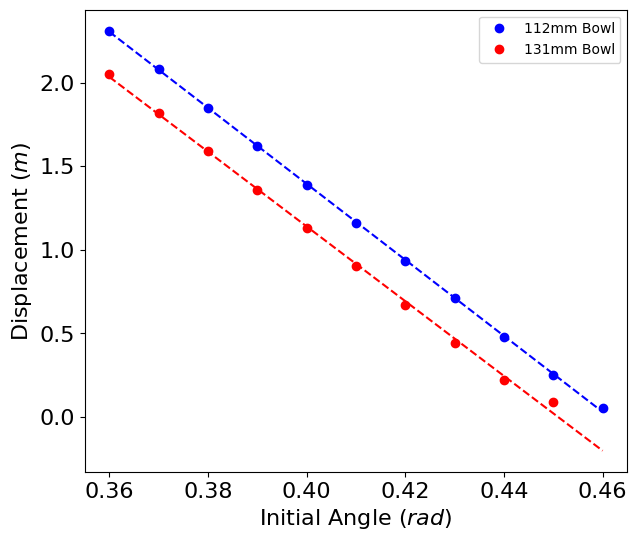

[-22.73636364  10.48827273]
[-22.35757576  10.08181818]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.36,0.46,11)
x1=[0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46]
y1=[2.31,2.08,1.85,1.62,1.39,1.16,0.93,0.71,0.48,0.25,0.05]
x2=[0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45]
y2=[2.05, 1.82, 1.59, 1.36, 1.13, 0.9, 0.67, 0.44, 0.22, 0.09]
plt.figure(figsize=(7,6))
plt.plot(x1, y1,'bo', label='112mm Bowl')
plt.plot(x2, y2,'ro', label='131mm Bowl')
a1=np.polyfit(x1, y1, 1)
a2=np.polyfit(x2, y2, 1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"Initial Angle $(rad)$", fontsize=16)
plt.ylabel('Displacement $(m)$',fontsize=16 )
ay1=a1[0]*x+a1[1]
ay2=a2[0]*x+a2[1]
plt.plot(x,ay1,'b--')
plt.plot(x,ay2,'r--')
plt.legend()
plt.savefig("DvTheta.pdf")
plt.show()
print(a1)
print(a2)

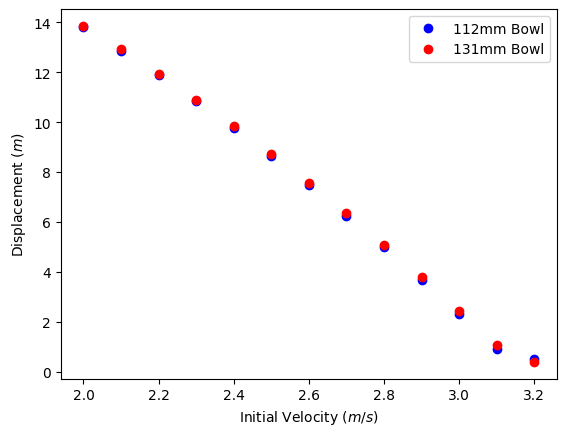

[-11.6021978   37.39340659]
[-11.61538462  37.49692308]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x1 = [2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2]
y1 = [13.81,12.87,11.88,10.84,9.77,8.64,7.47,6.25,4.99,3.68,2.32,0.92,0.52]
x2 = [2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2]
y2 = [13.86,12.92,11.94,10.91,9.84,8.72,7.56,6.35,5.09,3.79,2.44,1.05,0.39]
plt.plot(x1, y1,'bo',label='112mm Bowl')
plt.plot(x2,y2,'ro',label='131mm Bowl')
plt.xlabel("Initial Velocity $(m/s)$")
plt.ylabel('Displacement $(m)$')
plt.legend()
a1 = np.polyfit(x1, y1, 1)
a2 = np.polyfit(x2, y2, 1)
plt.savefig("DvV.pdf")
plt.show()

print(a1)
print(a2)